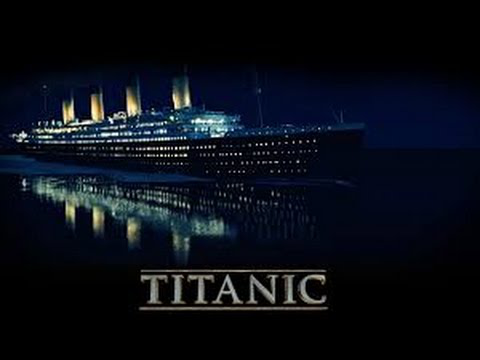

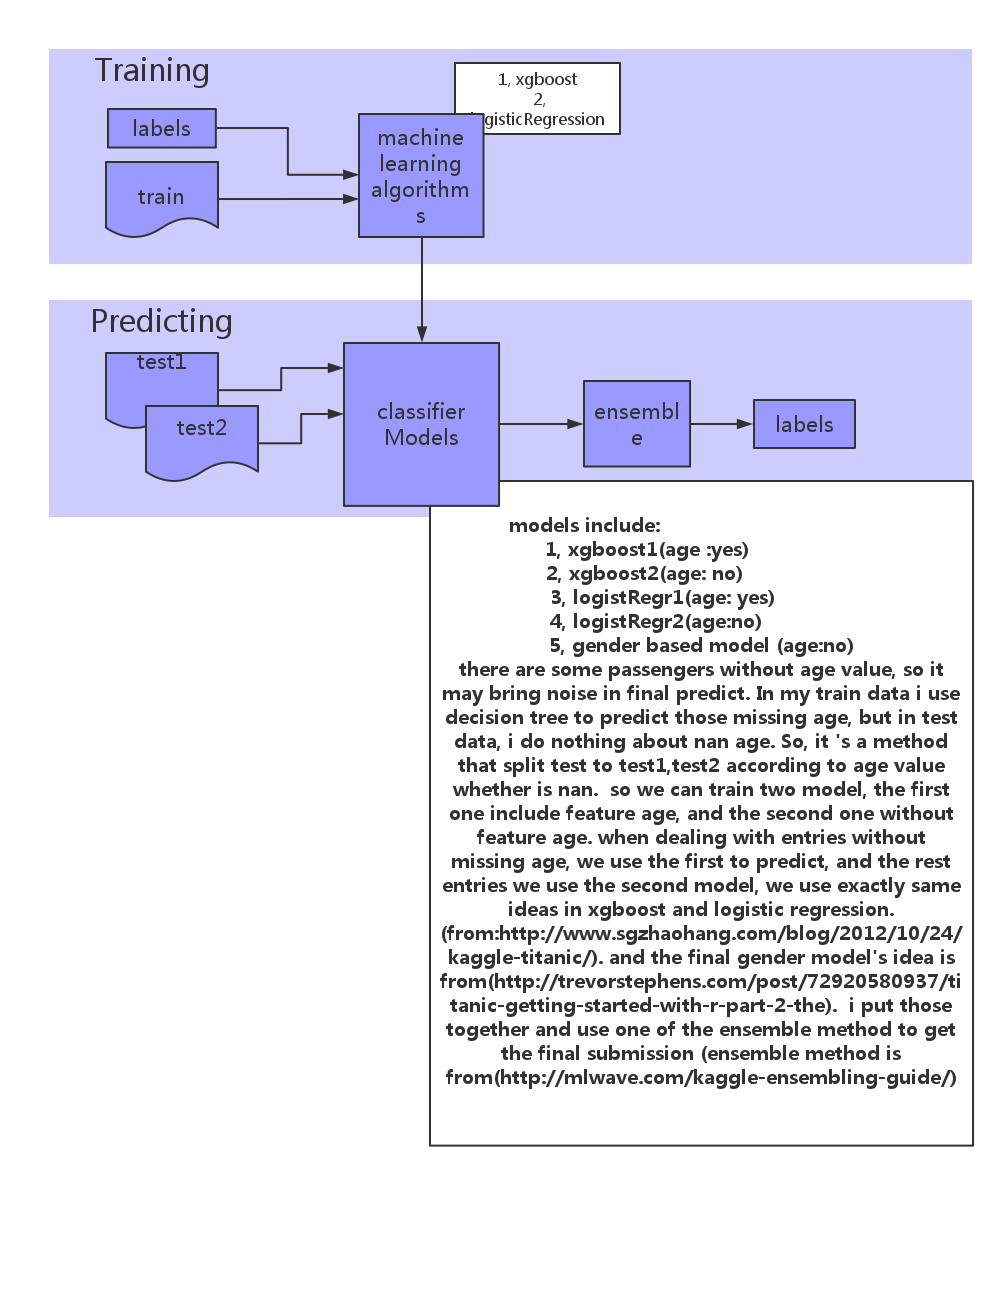

### some tutorial link mentioned above
#### link:http://www.sgzhaohang.com/blog/2012/10/24/kaggle-titanic/
#### link:http://trevorstephens.com/post/72920580937/titanic-getting-started-with-r-part-2-the 
#### link:http://mlwave.com/kaggle-ensembling-guide/

In [1]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [5]:
train_df = pd.read_csv("./data/train.csv")
test_df=pd.read_csv("./data/test.csv")

df = pd.concat([train_df,test_df])
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df = df.reindex_axis(train_df.columns, axis=1)
#put together for feature generating convinient
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
#Age, Fare, Cabin, Embarked has nan value
#Name, Sex, Ticket, Cabin, Embarked's data type is not welcome to scikit, need to convert
#discover some new features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


#  Feature Engineering

### Feature Engineering/Title

In [8]:
import re
def title(x):
    return re.split(r'[,.]',x)[1].strip()

df['Title'] = df.Name.apply(lambda x:title(x))


In [9]:
print pd.value_counts(df.Title)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
dtype: int64


In [11]:
#there are a few very rare titles in here, so let’s combine a few of the most unusual ones
df.loc[df.Title == 'Mme','Title'] = 'Mlle'
df.loc[(df.Title=='Capt')|(df.Title=='Don')|(df.Title=='Major'),'Title'] = 'Sir'
df.loc[(df.Title=='Dona')|(df.Title=='the Countess')|(df.Title=='Jonkheer'),'Title'] = 'Lady'
print pd.value_counts(df.Title)

Mr        757
Miss      260
Mrs       197
Master     61
Dr          8
Rev         8
Sir         5
Col         4
Lady        4
Mlle        3
Ms          2
dtype: int64


In [12]:
df.head()
#take care title columns data type

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr


In [13]:
#there is few of title, let's represent it by num 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.Title)
df.Title= le.transform(df.Title)
df.head()
#here we go

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,7
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,6


### Feature Engineering/ Sex

In [14]:
le.fit(df.Sex)
df.Sex = le.transform(df.Sex)
df.head()
#1 represents man

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,7
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,7
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,6


### Feature Engineering/ FamilySize

In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

### Feature Engineering/ Surname

In [16]:
def surname(x):
    return re.split(r'[,.]',x)[0].strip()

df['Surname'] = df.Name.apply(lambda x:surname(x))

In [ ]:
#pd.value_counts(df.Surname)

### Feature Engineering/ FamilyId

In [17]:
df['FamilyID'] = (df.FamilySize.astype(str) + df.Surname)

In [19]:
pd.value_counts(df.FamilyID).head()

11Sage        11
7Andersson     9
8Goodwin       8
7Asplund       7
6Panula        6
dtype: int64

In [20]:
le.fit(df.FamilyID)
df.FamilyID = le.transform(df.FamilyID)

### Feature Engineering/ handle missing value

In [21]:
#df.Age = df.Age.fillna(df.Age.median()), we discuss why we not handle it 
df.Fare = df.Fare.fillna(df.Fare.mean())
df.Cabin = df.Cabin.fillna('U0')#'U0' from tutorial, no meaning, just a name
df.Embarked = df.Embarked.fillna('S')#'S' is most common

In [22]:
le.fit(df.Cabin)
df.Cabin = le.transform(df.Cabin)
le.fit(df.Embarked)
df.Embarked = le.transform(df.Embarked)

#pd.value_counts(df.FamilyID)

# Split test and train data

In [26]:
train = df[df.Survived.isnull()== False]
test = df[df.Survived.isnull()]

test.reset_index(inplace=True)
test.drop('index', axis=1, inplace=True)
test = test.reindex_axis(test.columns, axis=1)

/home/hubuqin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# handle train's missing Age

In [27]:
#in my model no need to handle test's missing age, why? it may income some noise, you will understand it later, 
#we use decision tree to predict missing age
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

age_df = train[['Age','Pclass','Sex','Fare','Title','FamilySize']]

predictors = ['Pclass','Sex','Fare','Title','FamilySize']
knownAge = age_df.loc[ (train.Age.notnull()) ]
unknownAge = age_df.loc[ (train.Age.isnull()) ]

dtr.fit(knownAge[predictors],knownAge['Age'])
predictedAges = dtr.predict(unknownAge[predictors])
train.loc[train.Age.isnull(),'Age'] = predictedAges

/home/hubuqin/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Model 

### Model1: xgboost

In [28]:
# when we predict test's survived, we use this classifier to who has age value in test. 
#So we take age into consideration

from xgboost import XGBClassifier

from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

predictors_xgb1= ["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","FamilyID","FamilySize","Title"]

xgb1 = XGBClassifier(max_depth=2, n_estimators=300, learning_rate=0.05)
xgb1.fit(train[predictors_xgb1], train['Survived'])

print 'age'

age


In [29]:
# when we predict test's survived, we use this classifier to who has nan-age value in test. 
#So we does not take age into consideration

#from sklearn.cross_validation import cross_val_score
#from sklearn.grid_search import GridSearchCV

predictors_xgb2= ["Pclass","Sex","SibSp","Parch","Fare","Cabin","FamilyID","FamilySize","Title"]

xgb2 = XGBClassifier(max_depth=2, n_estimators=300, learning_rate=0.05)
xgb2.fit(train[predictors_xgb2], train['Survived'])
print 'non-age'


non-age


### Model2: LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression

predictors_lgr1= ["Age","SibSp","Parch","Fare","Cabin","FamilyID","FamilySize","Title"]

lgr1 = LogisticRegression(random_state=1,solver ='liblinear',penalty = 'l2')
lgr1.fit(train[predictors_lgr1], train['Survived'])
print 'age'

age


In [31]:
predictors_lgr2= ["SibSp","Parch","Fare","Cabin","FamilyID","FamilySize","Title"]

lgr2 = LogisticRegression(random_state=1,solver ='liblinear',penalty = 'l2')
lgr2.fit(train[predictors_lgr2], train['Survived'])
print 'non-age'

non-age


### model3: upgrade gender model

In [32]:
"""this model, you can find from Trevor Stephens's tutarial(link:
http://trevorstephens.com/post/72920580937/titanic-getting-started-with-r-part-2-the)
,I take some method, it improve my score up to 0.80383(from 0.7994)
it obviously, those men/women who has nan-value in age, most probably died in shipwreck. 
men has more probability died in shipwreck than women.
"""
test['Survived'] = 0 
test.loc[test.Sex == 0,'Survived'] = 1
test.loc[test.Age.isnull(),'Survived'] = 0
test.loc[test.Age.isnull()&(test.Sex == 0),'Survived'] = 1
test.loc[(test.Sex == 0)&(test.Pclass == 3)&(test.Fare>=20),'Survived'] = 0

pred_3 = test['Survived']

# predict

In [33]:
import math

pred_1 = []
pred_2 = []


for i in range(len(test)):
    age = test.loc[i:i,'Age']

    if math.isnan(age):# == float('nan'):
        pred_1.append(xgb2.predict(test.loc[i:i,predictors_xgb2]))
        pred_2.append(lgr2.predict(test.loc[i:i,predictors_lgr2]))
        
    else:
        pred_1.append(xgb1.predict(test.loc[i:i,predictors_xgb1]))
        pred_2.append(lgr1.predict(test.loc[i:i,predictors_lgr1]))
        


In [34]:
def convert_pred(pred):
    temp = []
    for i in pred:
        temp.append(int(i))
    return temp
    

In [36]:
pred_1 = convert_pred(pred_1)
pred_2 = convert_pred(pred_2)
pred_3 =  convert_pred(pred_3)

In [37]:
pred_1 = np.array(pred_1)
pred_2 = np.array(pred_2)
pred_3 = np.array(pred_3)

In [42]:
def submit(predictions,model=0):
    
    submission = pd.DataFrame({
            "PassengerId": test["PassengerId"],
            "Survived": predictions#.astype(int)
        })
    submission.to_csv('my_pred'+str(model)+'.csv', index=False)

In [44]:
submit(pred_1,1)
submit(pred_2,2)
submit(pred_3,3)

### now we have three prediction file, we just use ensemble-method on its

### code(need to run in terminal):python ensemble-method/kaggle_vote.py "my_pred*.csv" kaggle_vote.csv
### kaggle_vote will be the final submission. (it will got 0.80383 score )

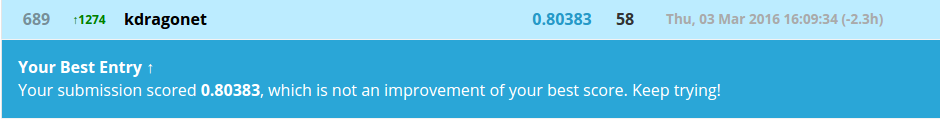

In [10]:
Image.open('./picture/rank.png')